# Day1 

## 1. Understand L1 and L2 Regularization

L1 and L2 Regularization are techniques to address over-fitting and feature selection. They can help create less complex model when you have a large number of features in your dataset.

L1 Regularization adds **"absolute value of magnitude"** of coefficient as penalty term (regularization term) to the loss function. L1 Regularization has sparse outputs and can build-in feature selection. It can shrinks the less important festure's coefficient to zero, removing some features altogether.

L2 Regularization adds **"Squared magnitude"** of coefficient as penalty term (regularization term) to the loss function. L2 Regularization has computational efficient due to having analytical solutions.

Traditional methods like cross-validation, stepwise regression to handel over-fitting and perform feature selection works well with a small set of features but Regularization is a great alternative when we are dealing with a large set of features.

Reference:   
http://www.chioka.in/differences-between-l1-and-l2-as-loss-function-and-regularization/  
https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c  
Video: https://www.youtube.com/watch?v=d6XDOS4btck

## 2. Understand ROC Curve, explaining code

ROC (Receiver Operating Characteristic) Curve is a commonly used graph that summarizes the performance of classifier over all possible thresholds. It is generated by plotting the True Positive Rate (y-axis) against the False Positive Rate (x-axis) as you vary the threshold for assigning observations to a given class.  
https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

In [2]:
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

### 1. Import Iris dataset to play with, and preprocess the dataset

In [5]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
# load the data set in python, assign X, y value.

Binarize the output

In [7]:
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]
# translate y to multi-class classification case
# n_classes is the number of class

Add noisy features to make the problem harder

In [16]:
random_state = np.random.RandomState(0)
# pseudo-random number generator
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]
# concatenate X and noisy (generated random number)
# random number is 150*800 array

Shuffle and split training and test sets

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)
# train_test_split is used to split arrays into random train and test subsets
# test_size=.5 means the proportion of the dataset to include in the test split
# random_state is the seed used by the random number generator, to make sure the split remain same after every execution

Learn to predict each class against the other.

**One-vs-the-rest (OvR)** is a multiclass/ cultilable strategy (One-vs-all)  
This is a strategy consists in fitting one classifier per class. For each classifier, the class is fitted against all the other classes. One advangtage of this approach is its interpretability. This is the most commonly used strategy for multiclass classification and is a fair default choice.

**Support Vector Classification** is based on libsvm

In [22]:
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True, random_state= random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

### 2. Compute ROC curve and ROC area for each class

#### roc_curve has three returns, fpr, tpr, and thresholds

In [26]:
fpr = dict()   # False Positive Rate
tpr = dict()   # True Positive Rate
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_score[:, i])
    # roc_curve(y_true, y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])
# calculate roc_curve and roc_auc for each class

#### Compute micro-average ROC curve and ROC area

In [29]:
fpr['micro'], tpr['micro'], _ = roc_curve(y_test.ravel(), y_score.ravel())
# y_test.ravel() reduce multi-dimension to one-dimension
roc_auc['micro'] = auc(fpr['micro'], tpr['micro'])

#### Compute macro-average ROC curve and ROC area

In [40]:
# Aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

In [41]:
# Interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

In [42]:
# Average it and compute AUC
mean_tpr /= n_classes

fpr['macro'] = all_fpr
tpr['macro'] = mean_tpr
roc_auc['macro'] = auc(fpr['macro'], tpr['macro'])

### 3. Plot ROC curves

Plot of a ROC curve for a specific class

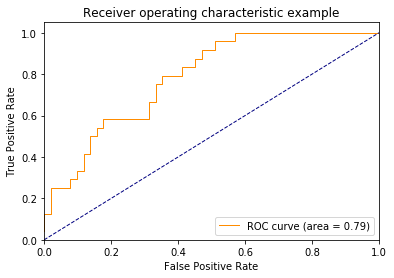

In [39]:
plt.figure()
lw = 2
# lw means line weight
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
# plot roc_curve, %0.2f means remaining two decimals
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
# set x, y coordinate
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
# set the location of legend
plt.show()

Plot ROC curve for the multiclass problem

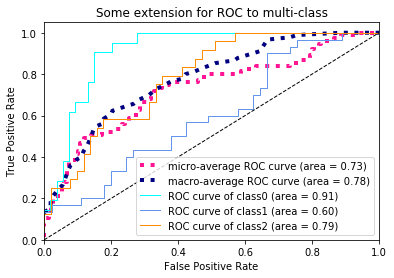

In [51]:
plt.figure()
# plot micro-average ROC curve
plt.plot(fpr['micro'], tpr['micro'],
        label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc['micro']),
        color='deeppink', linestyle=':', linewidth=4)

# plot macro-average ROC curve
plt.plot(fpr['macro'], tpr['macro'],
        label='macro-average ROC curve (area = {0:0.2f})'.format(roc_auc['macro']),
        color='navy', linestyle=':', linewidth=4)

# plot the ROC curves for each class
colors = cycle(['aqua', 'cornflowerblue', 'darkorange'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
            label='ROC curve of class{0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0,1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension for ROC to multi-class')
plt.legend(loc='lower right')
plt.show()